In [1]:
import seaborn as sns
sns.set_theme(style="whitegrid")
from dataloader import DataLoader

import matplotlib.pyplot as plt

In [2]:
loader = DataLoader(hs_code=282520)

_initialize_data took 27.3283 seconds


In [3]:
polar_df = loader.get_data()
df = polar_df.to_pandas()

years = sorted(df['t'].unique())
top_n = 20

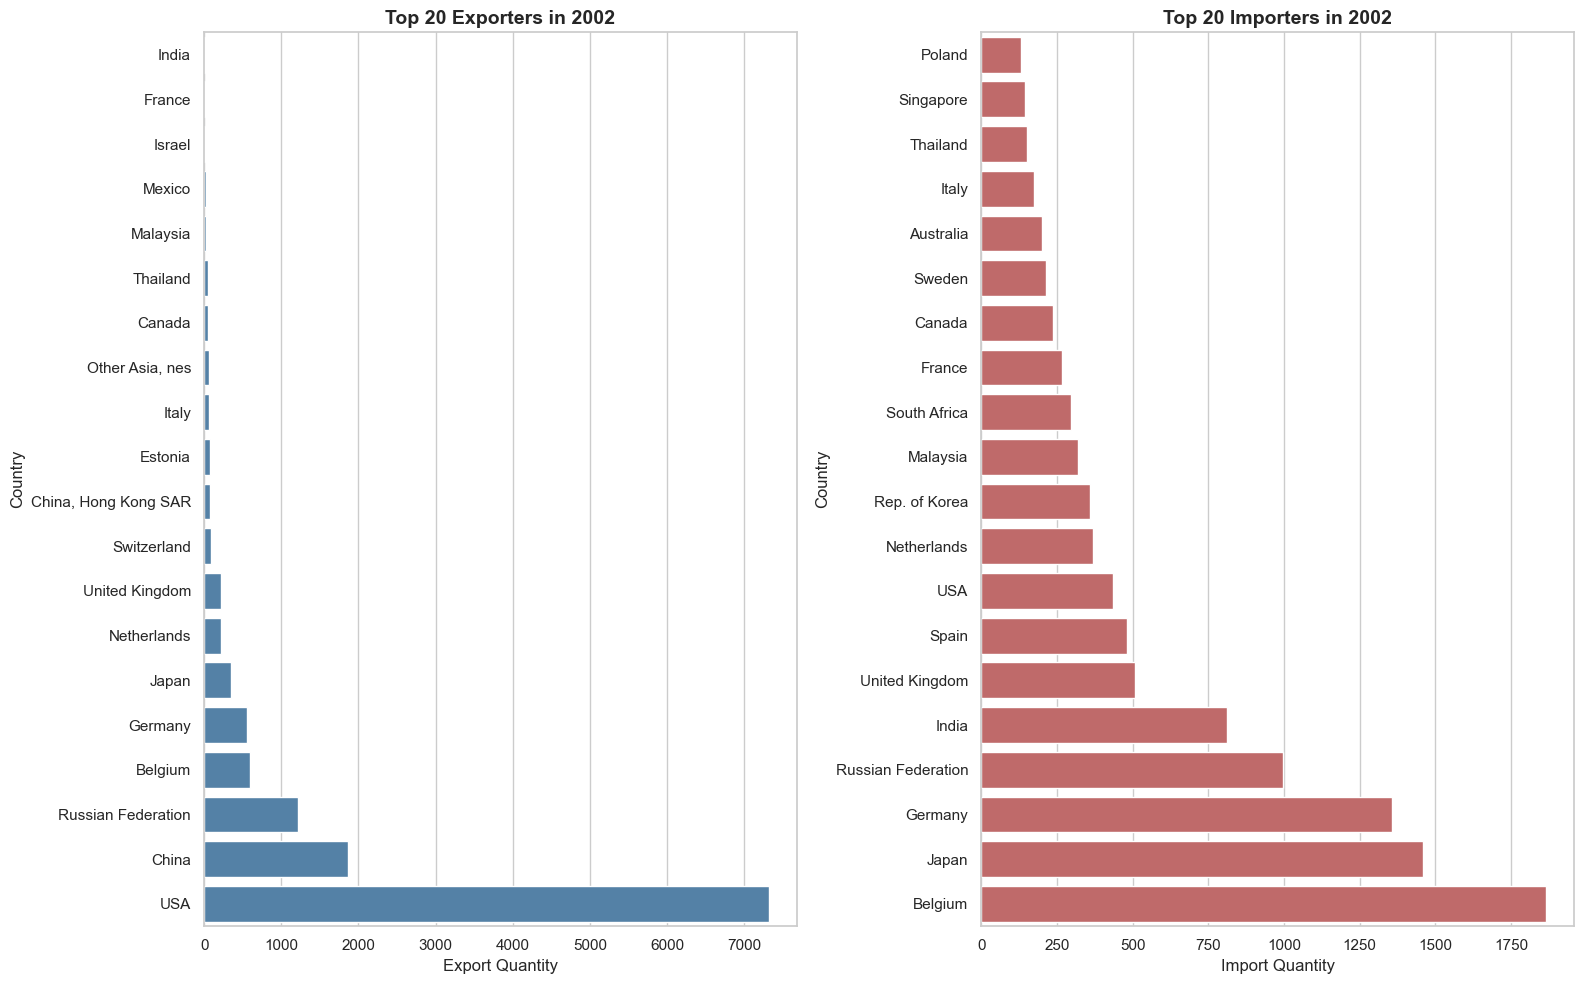

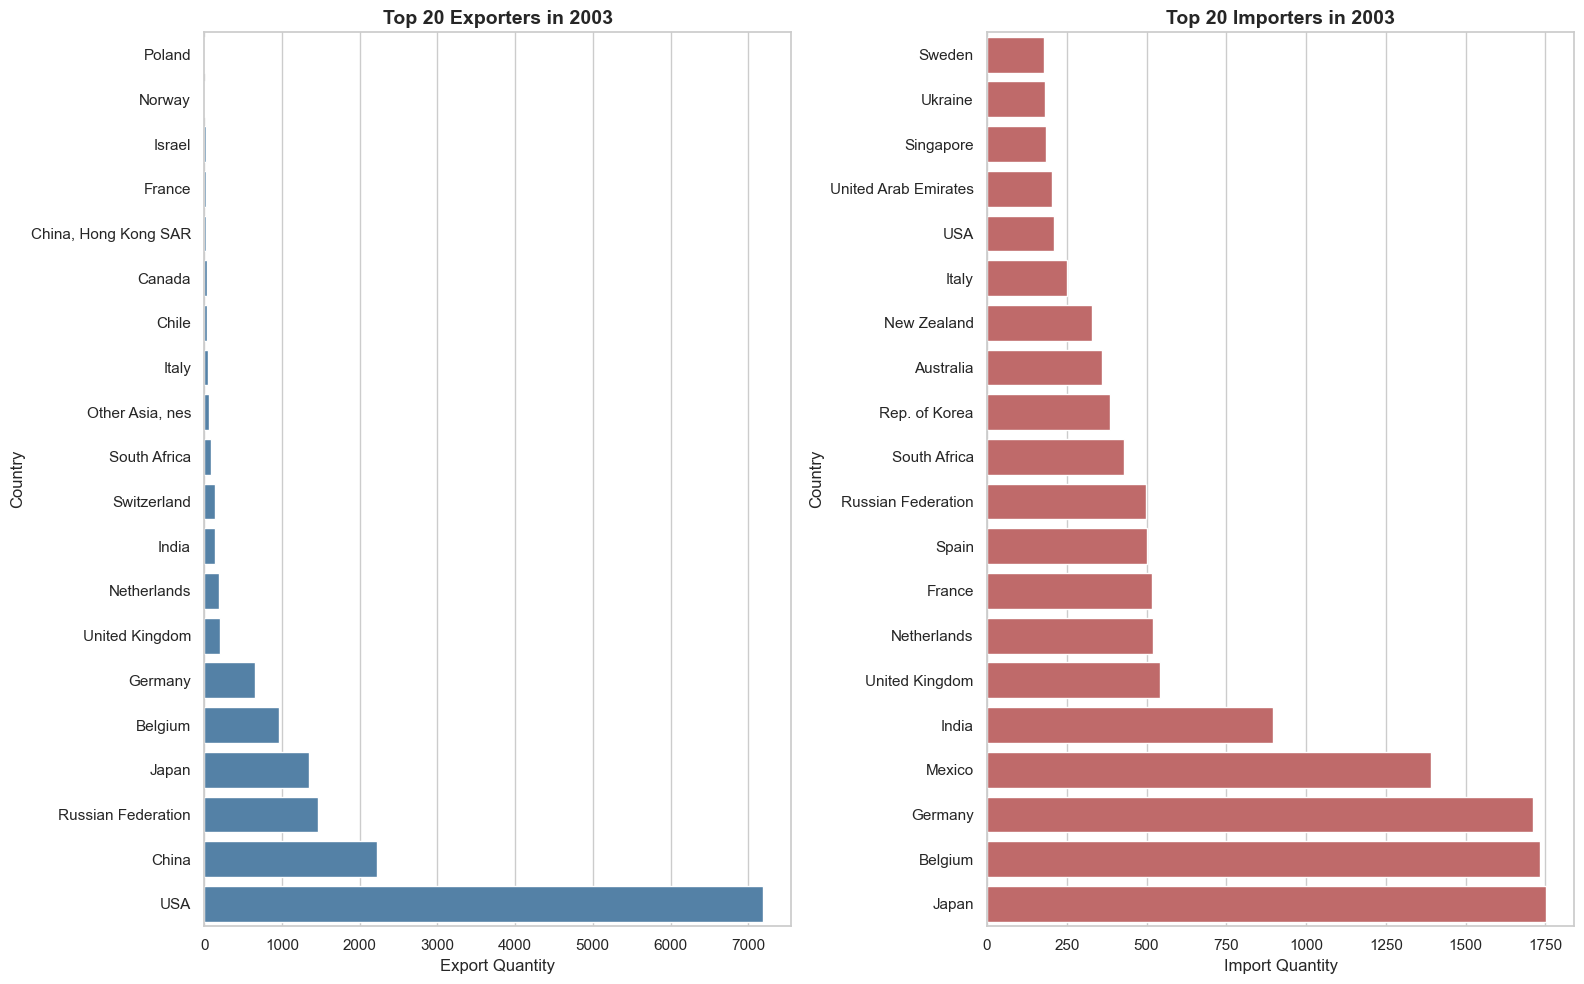

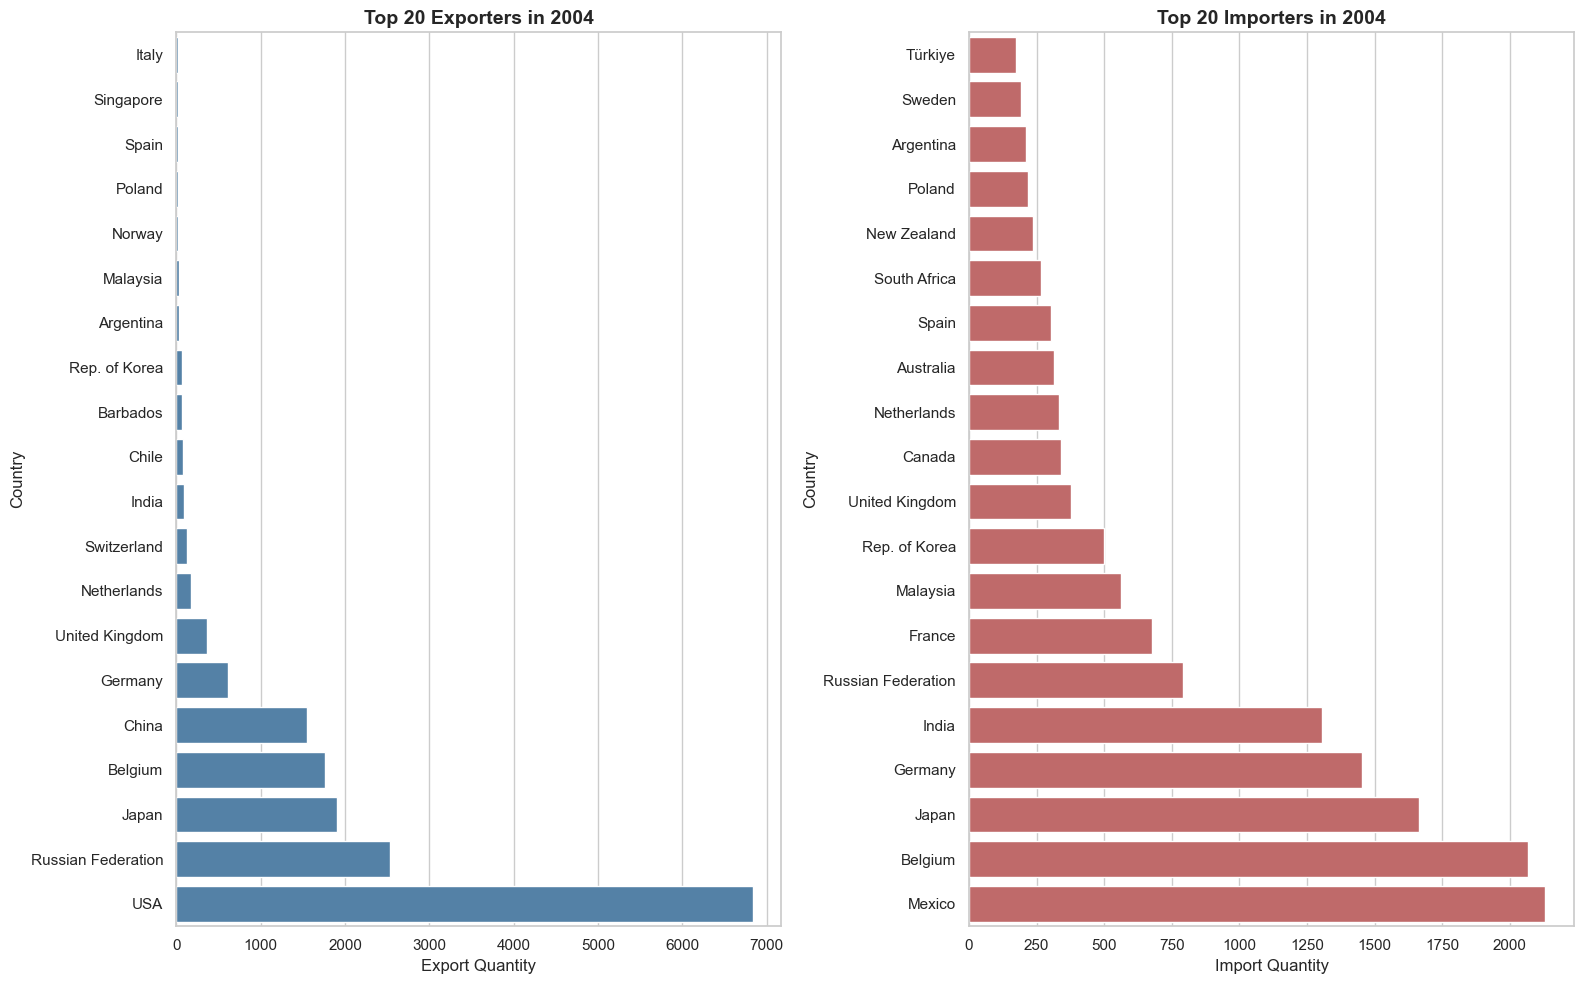

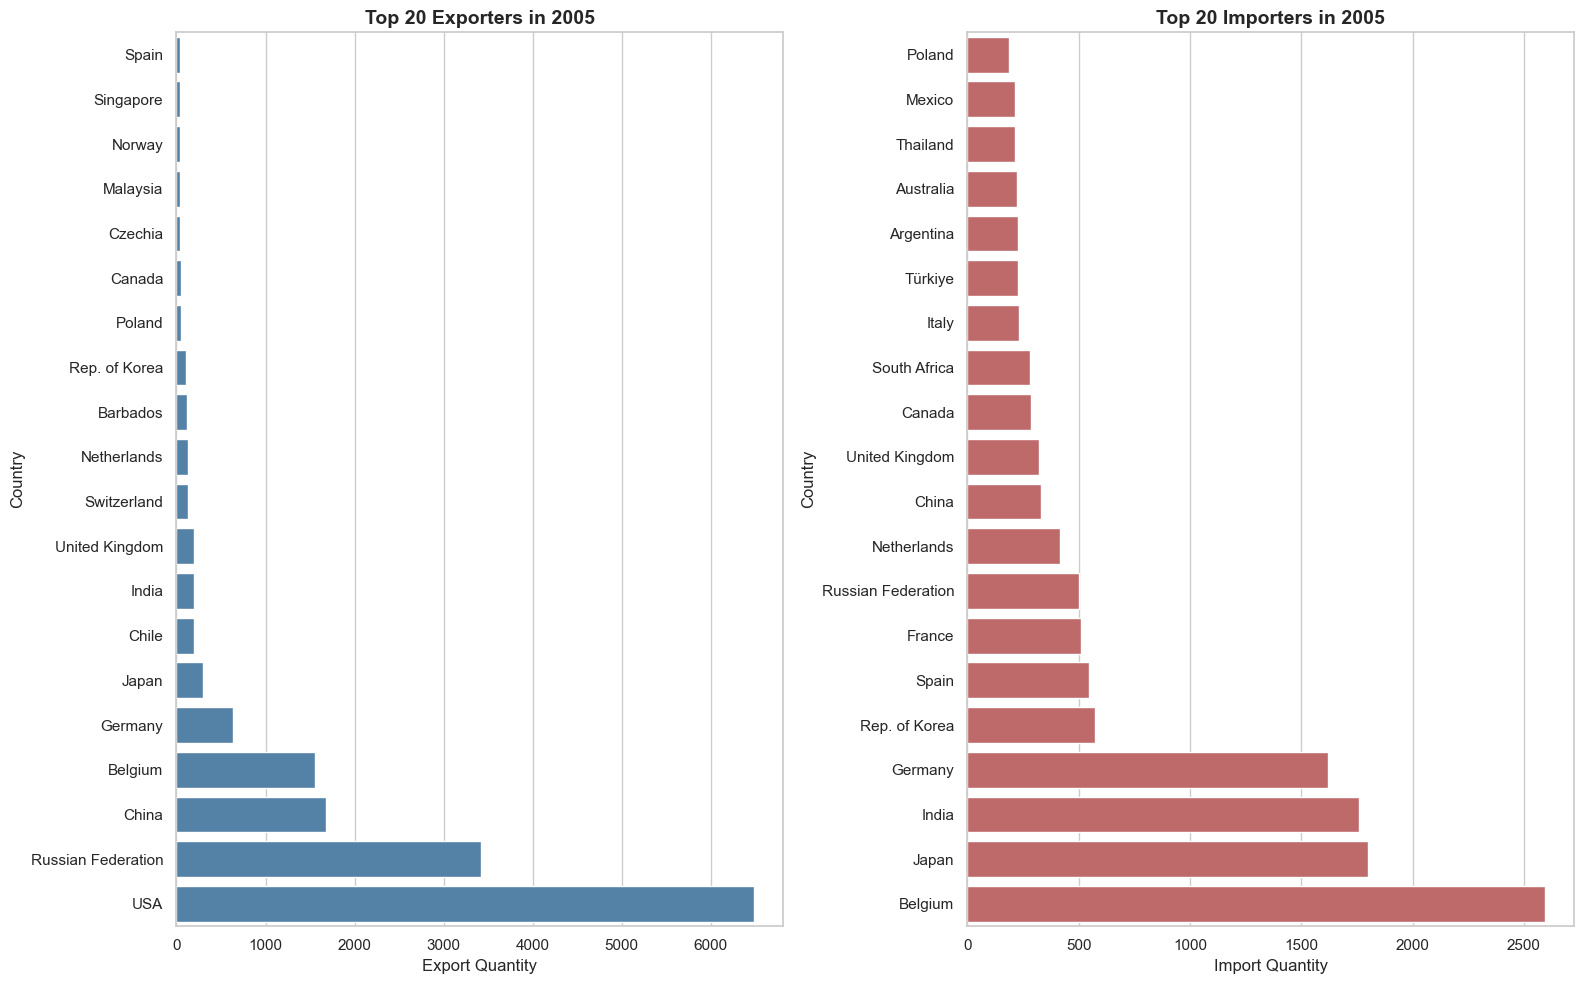

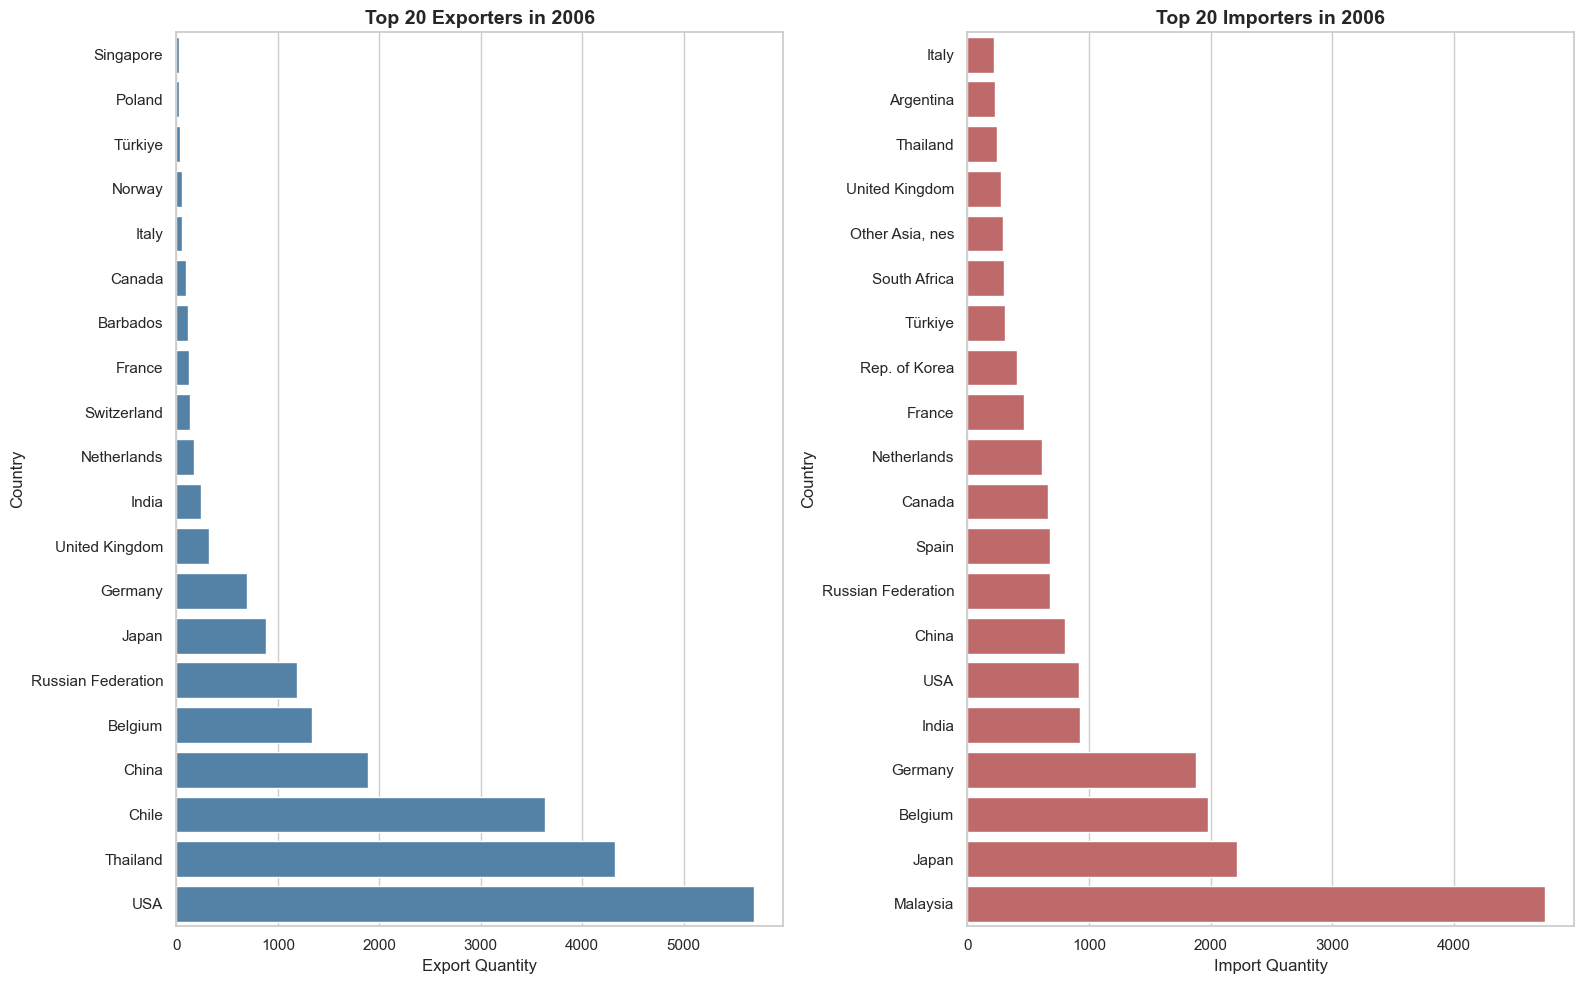

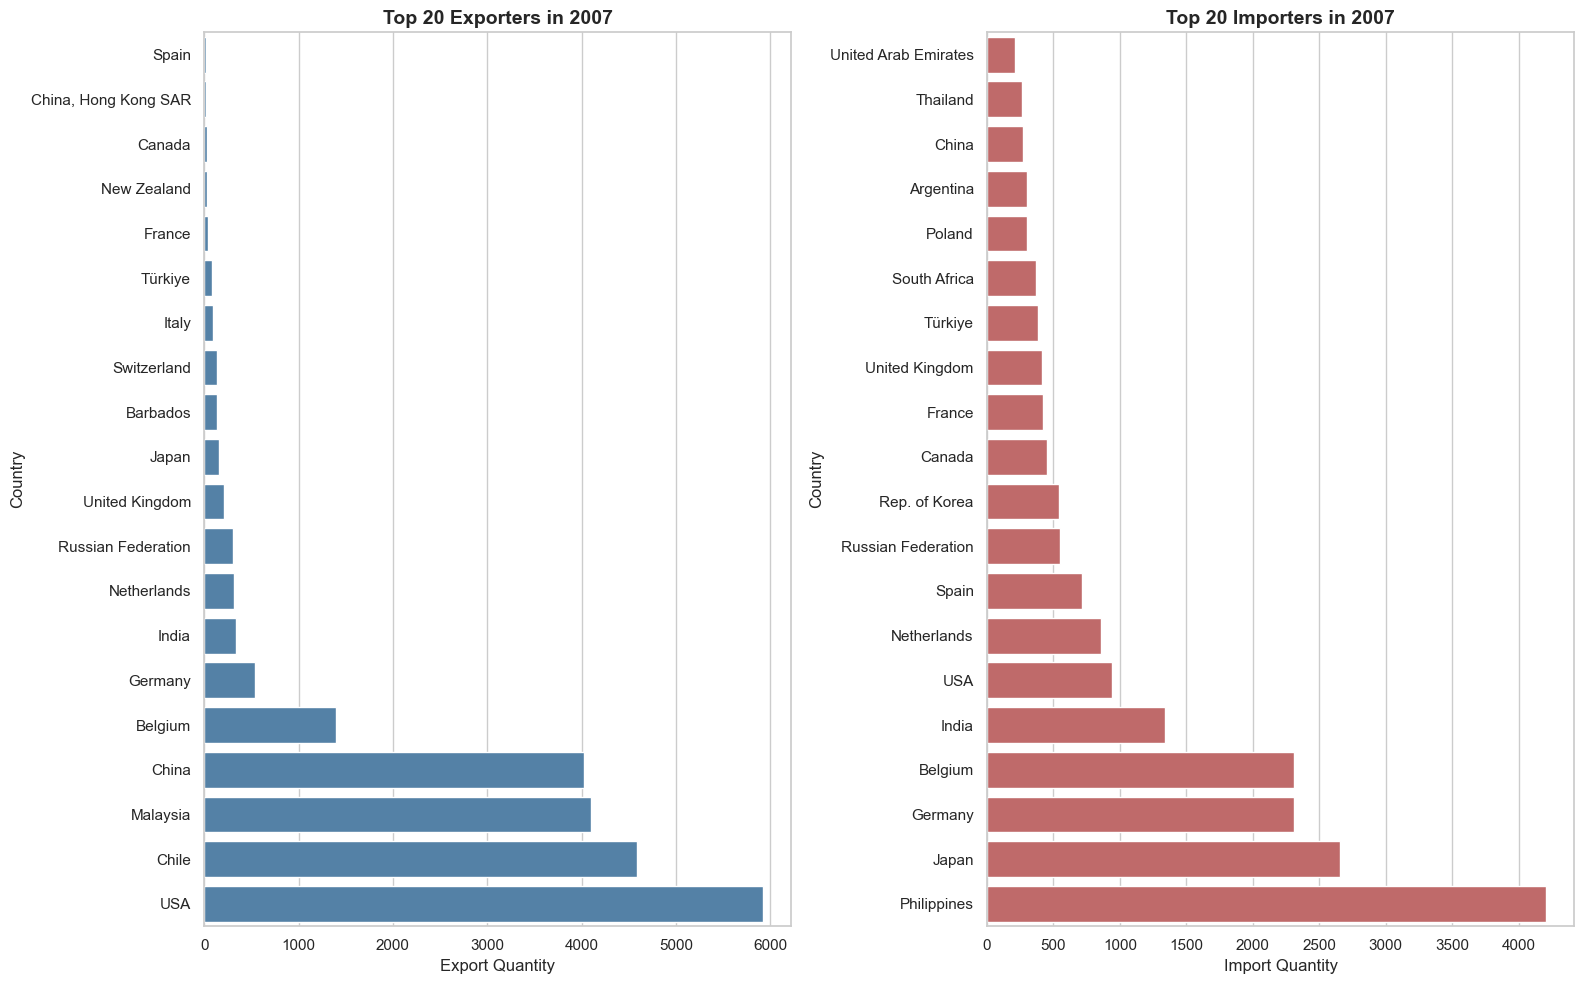

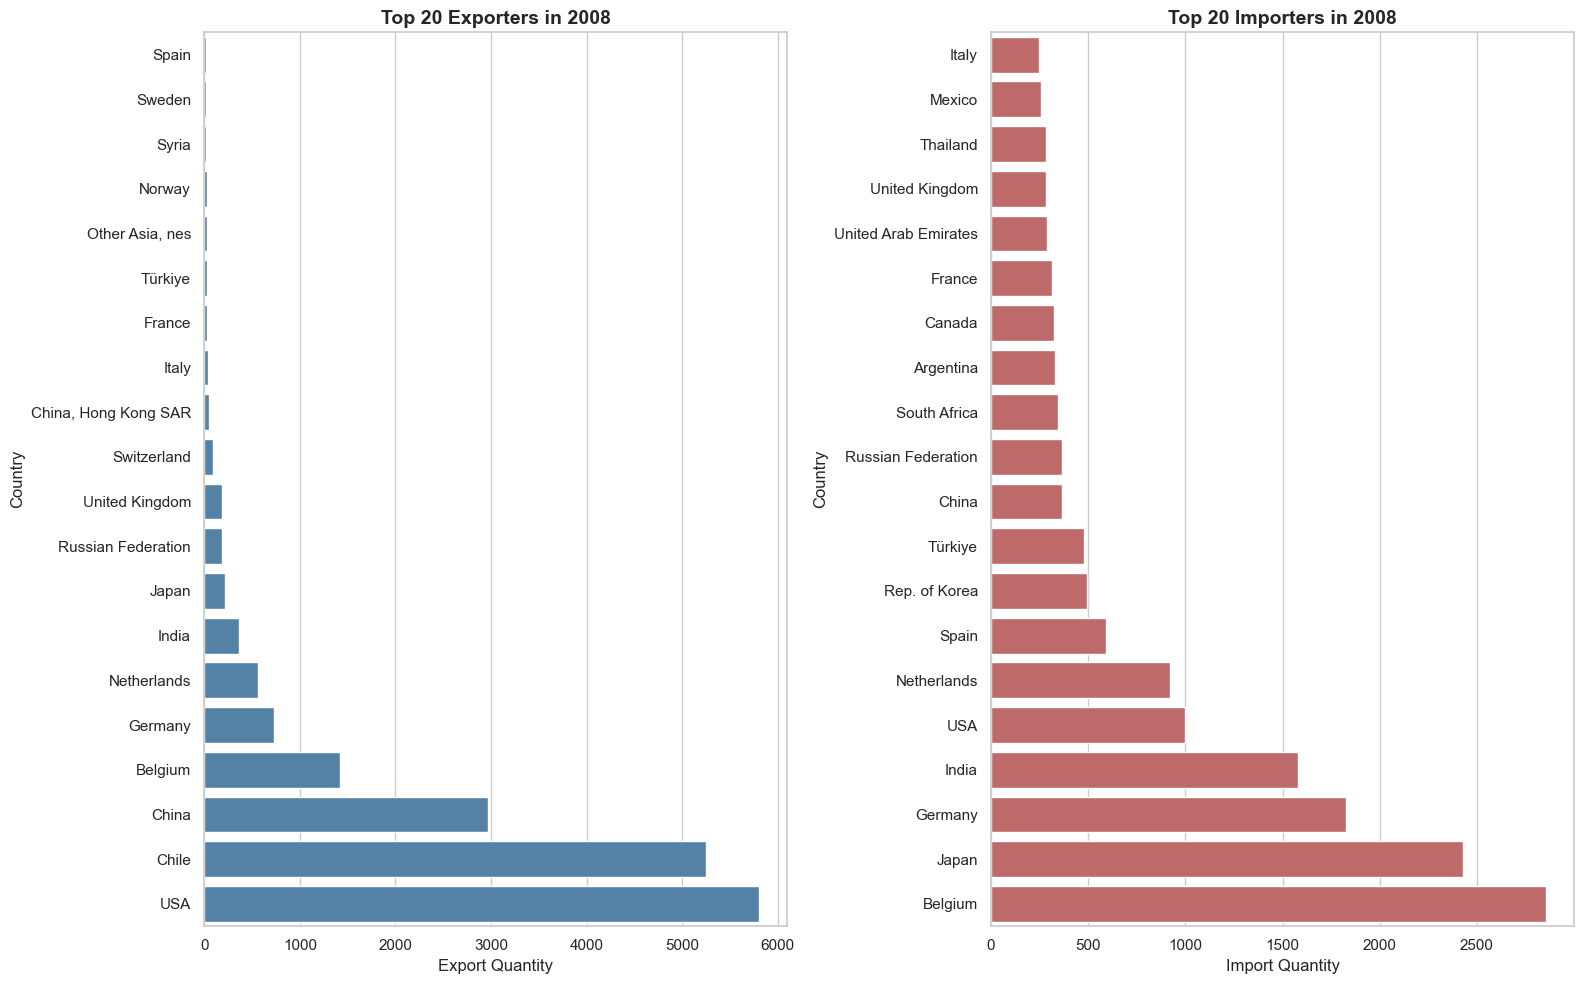

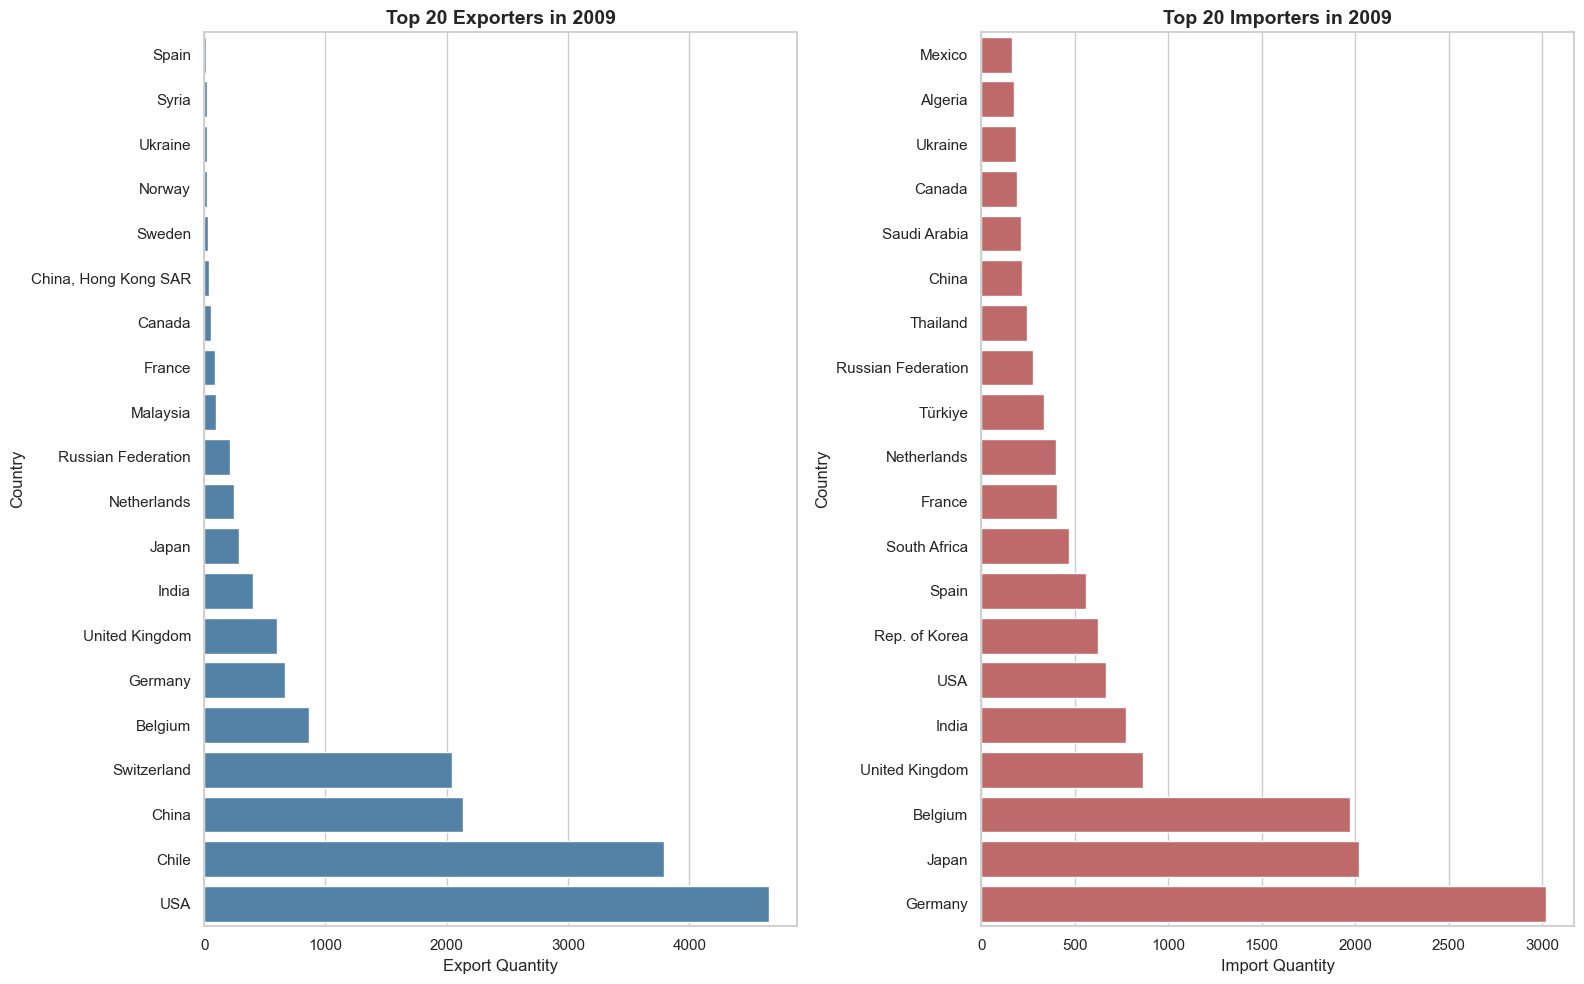

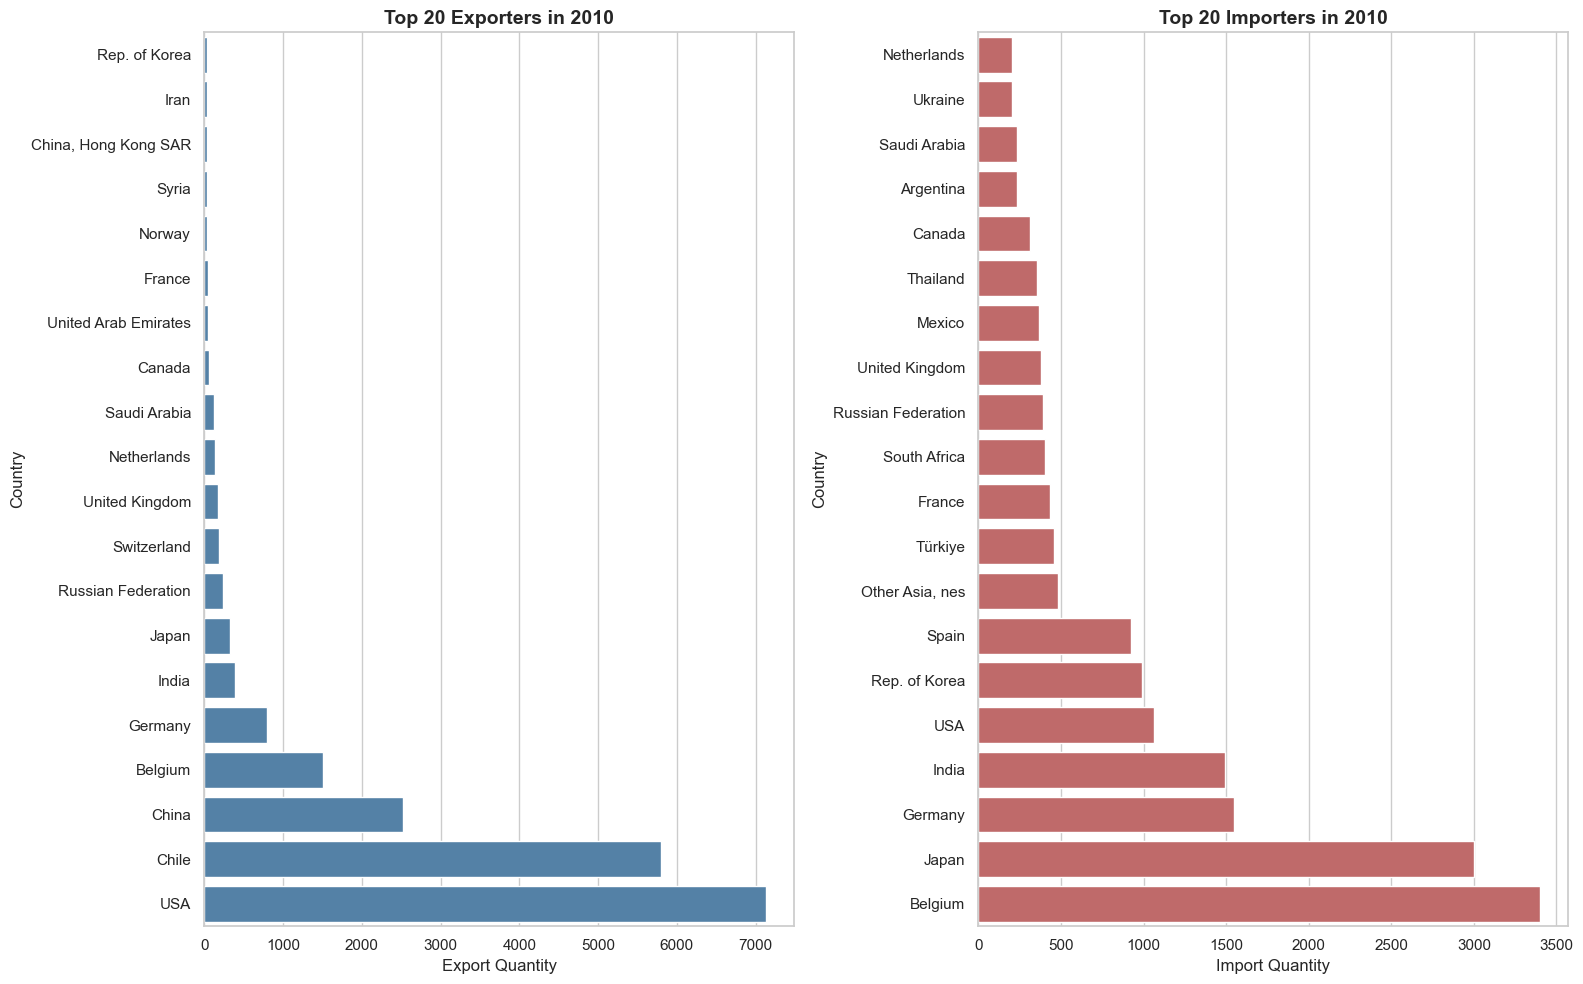

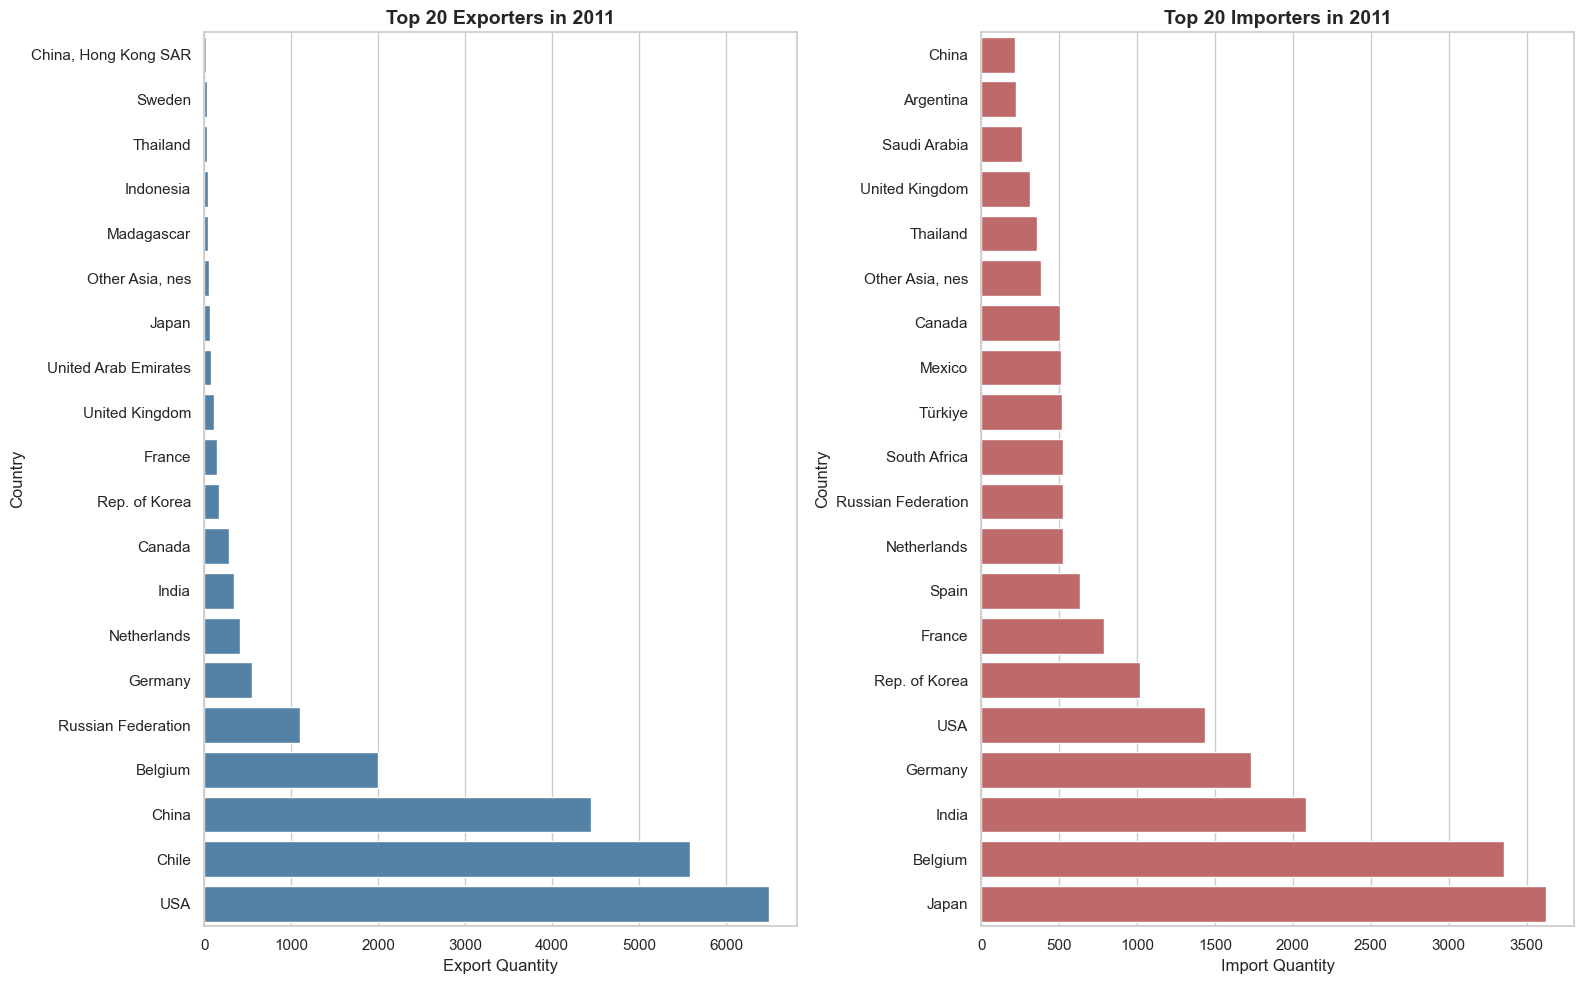

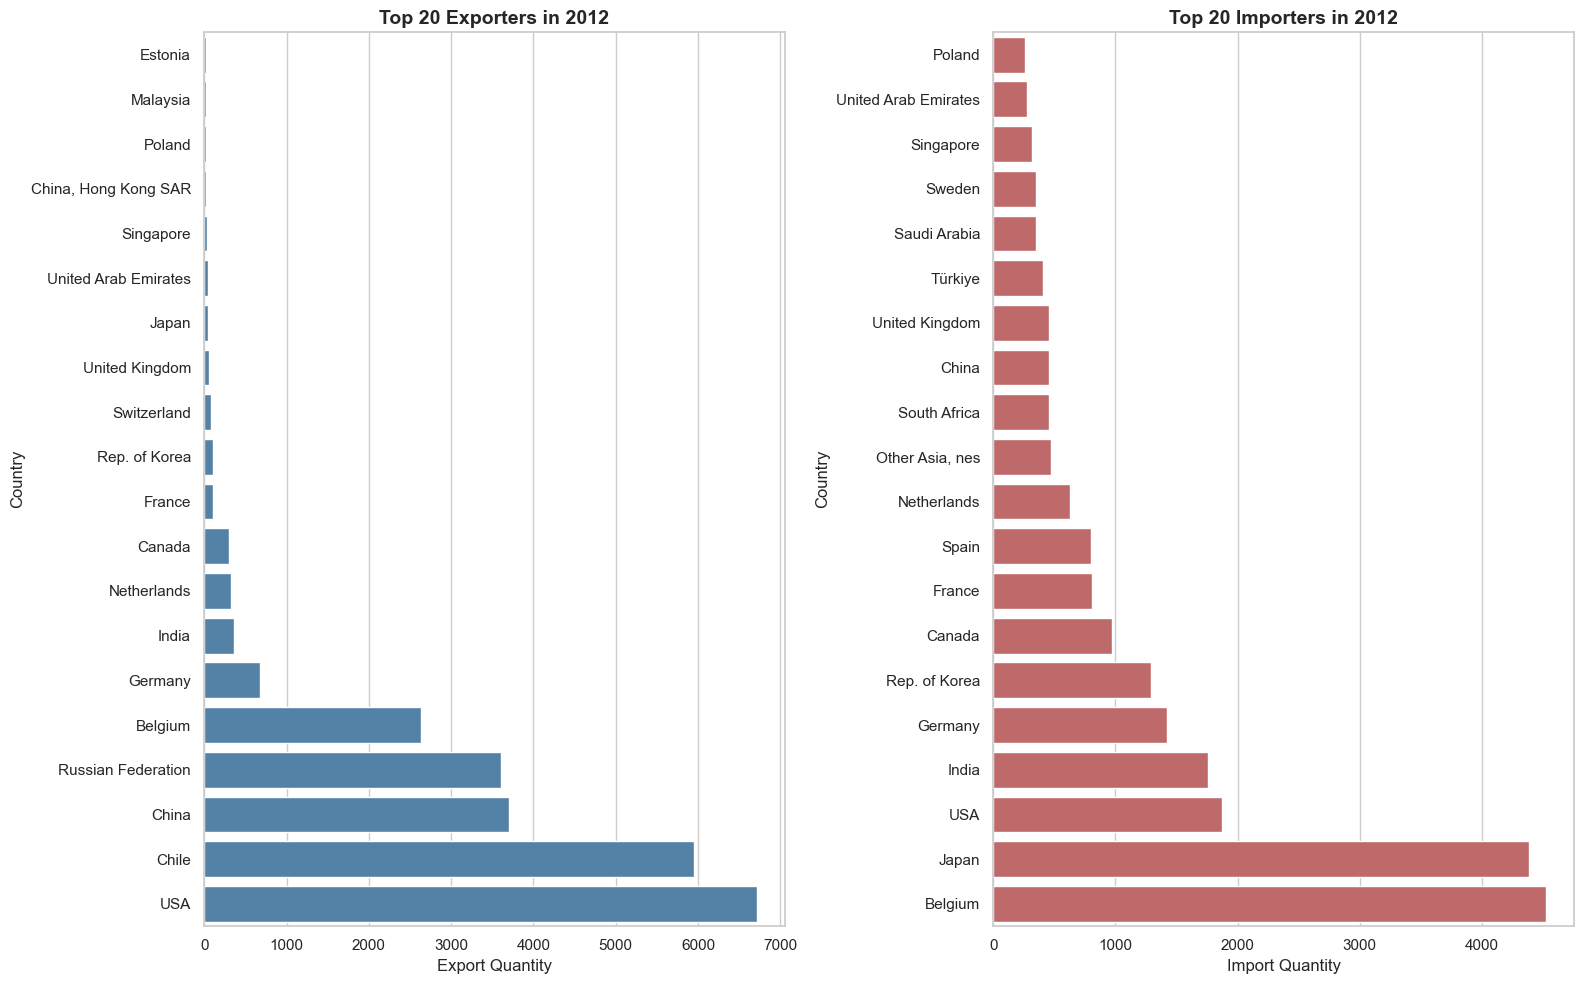

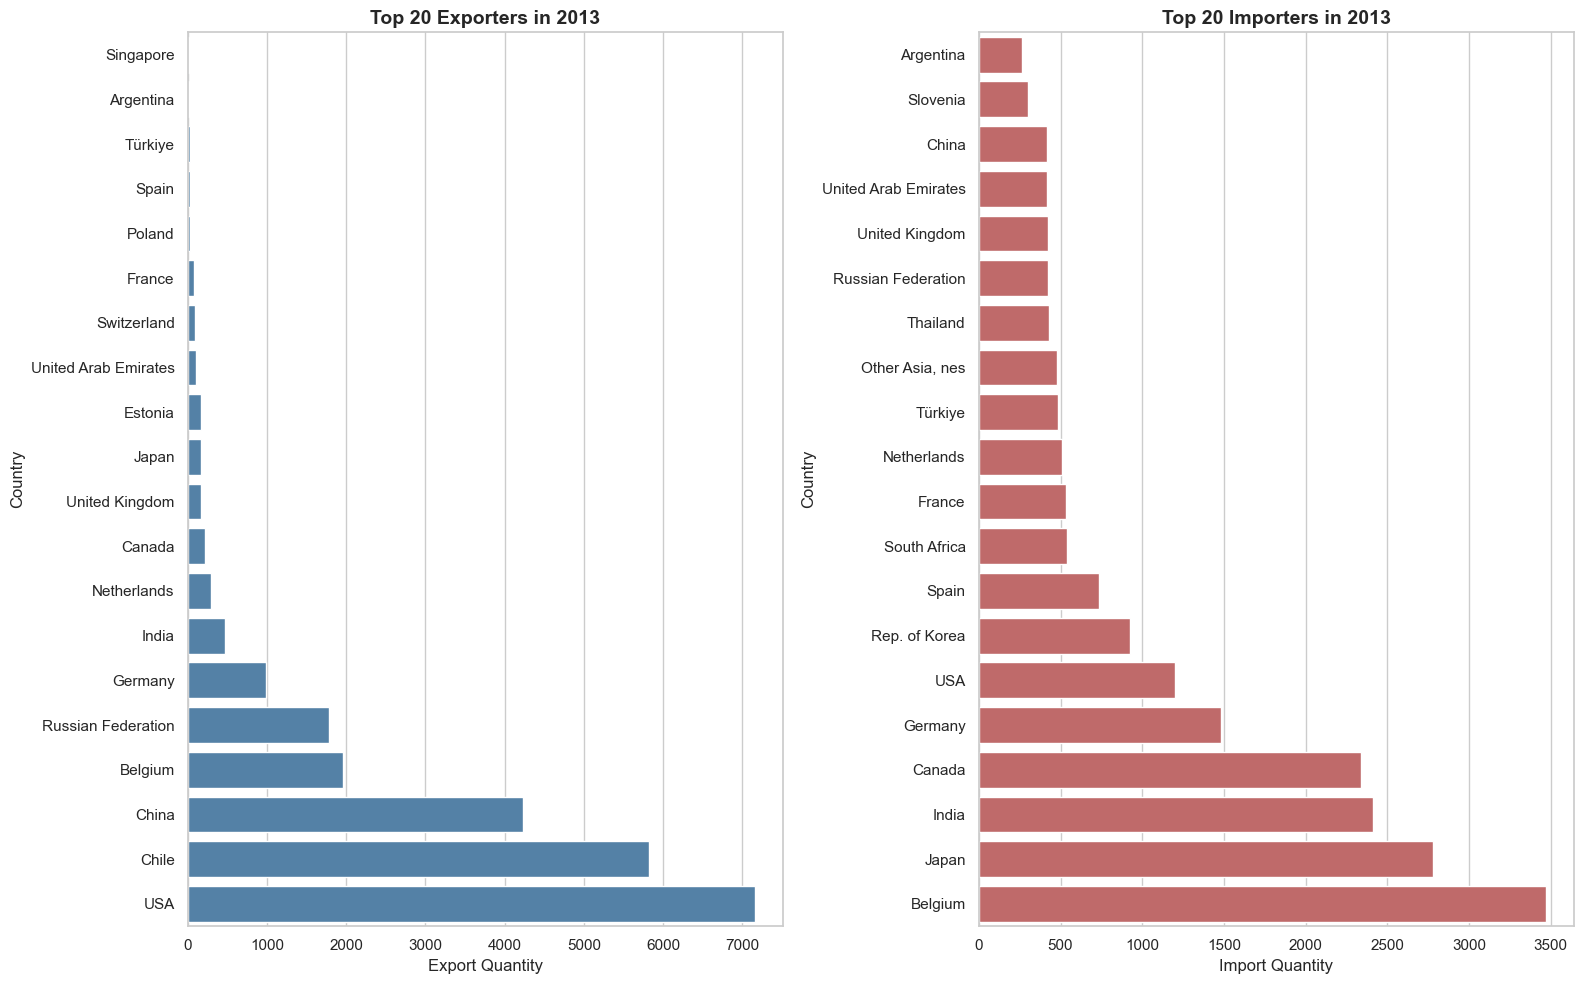

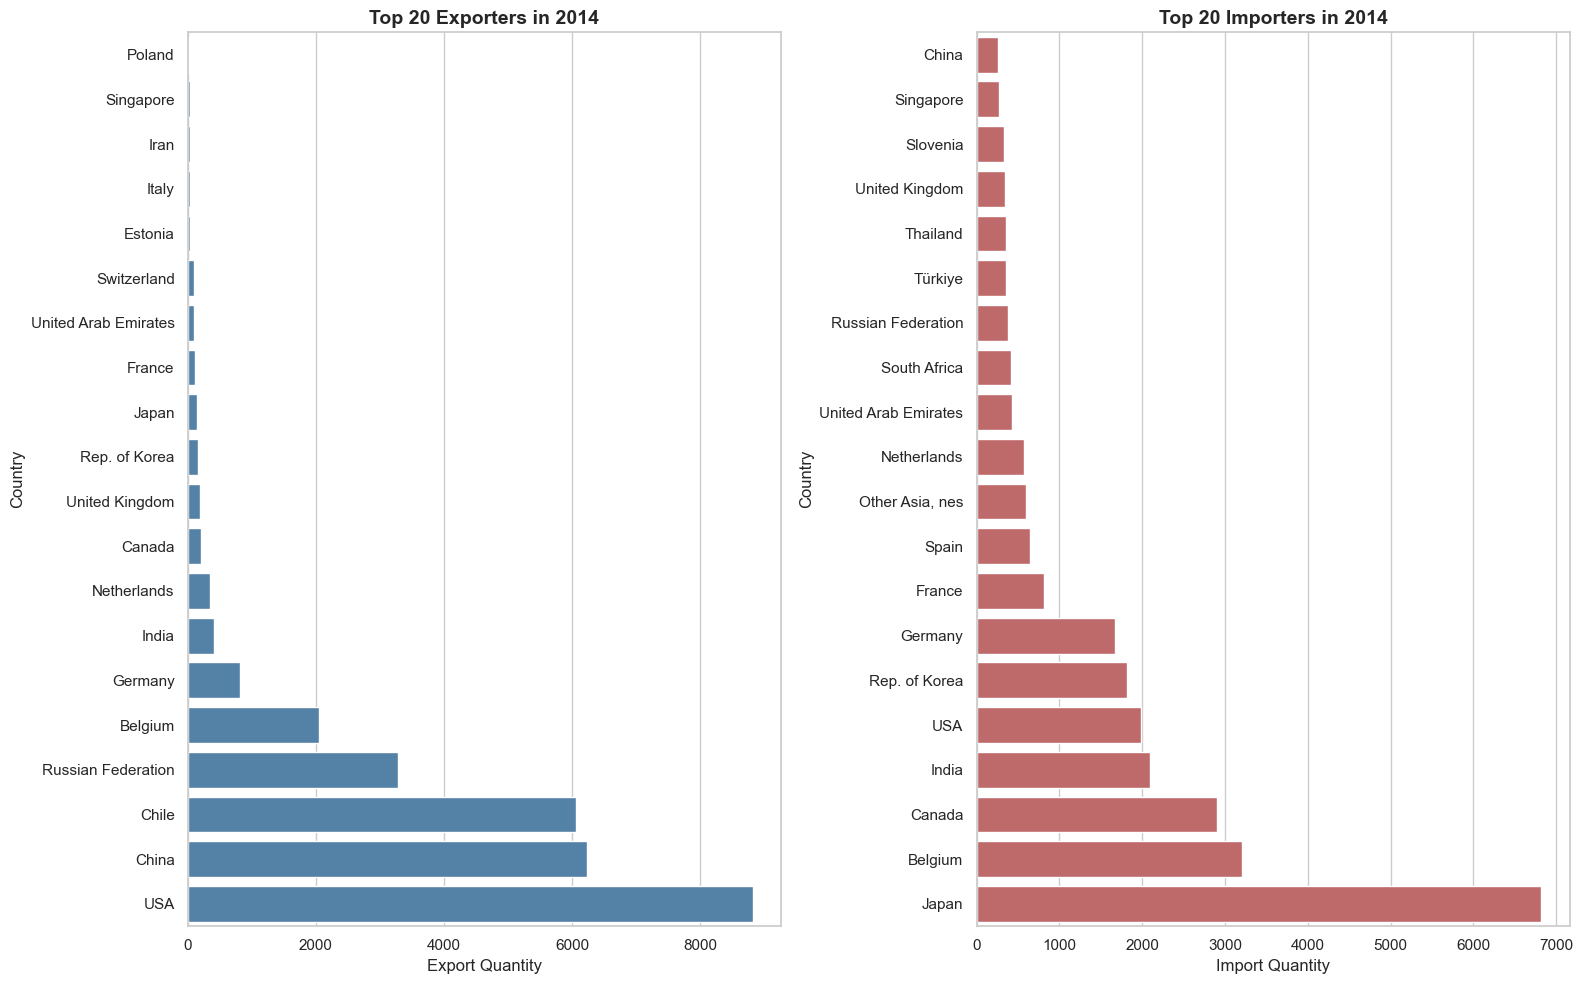

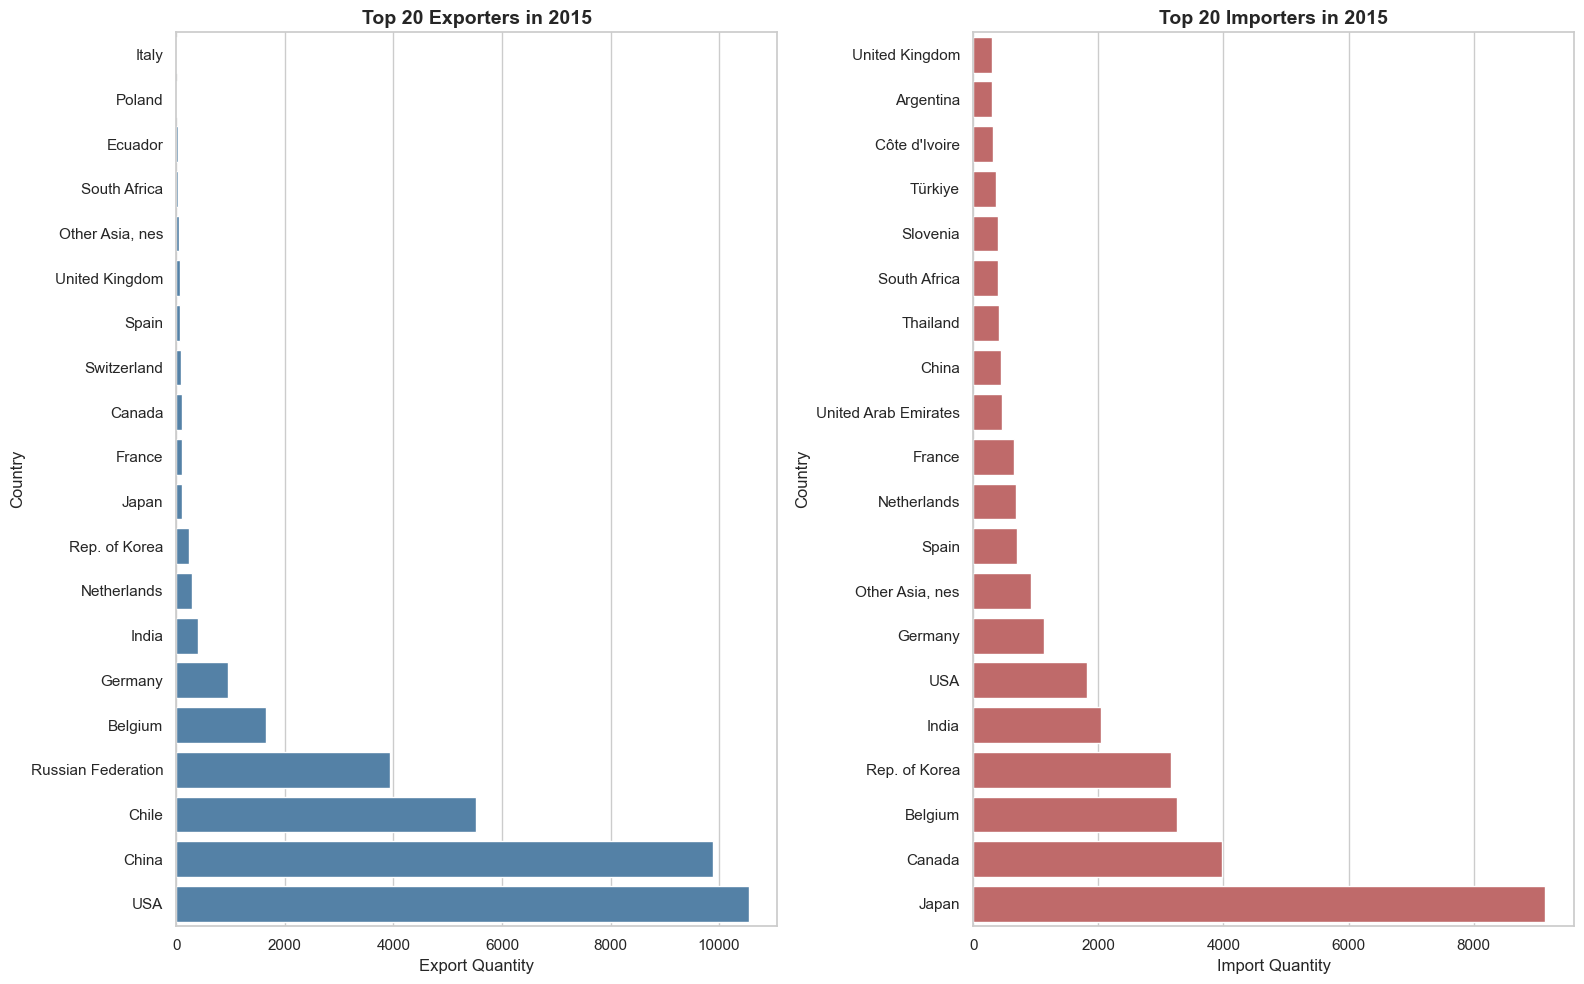

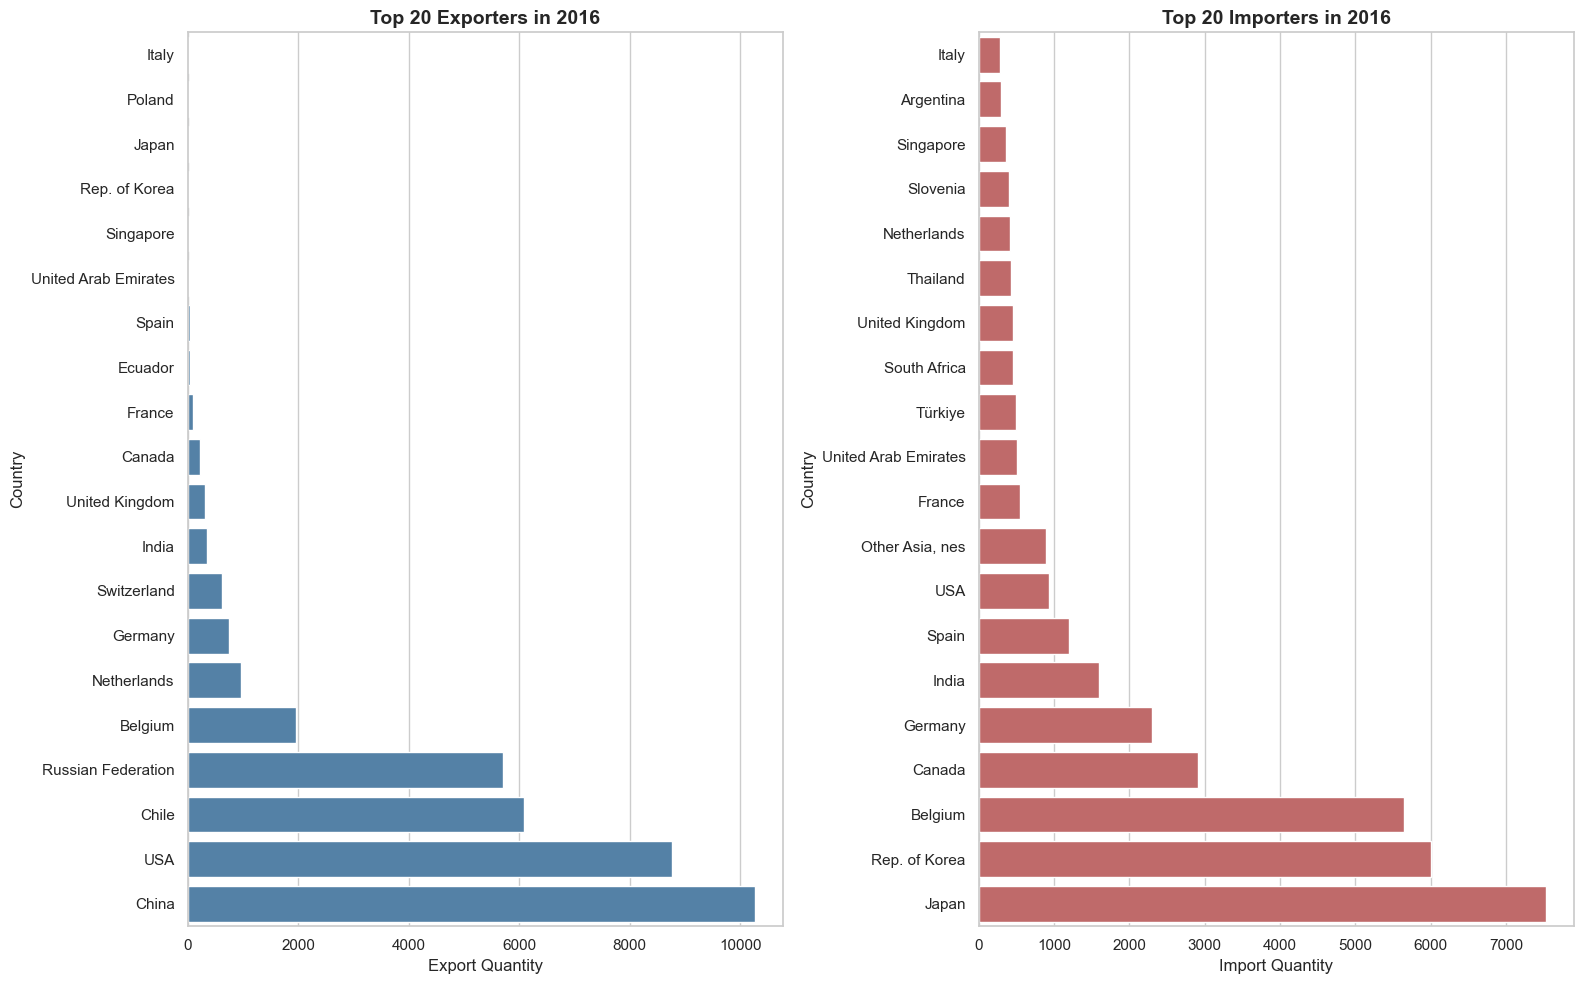

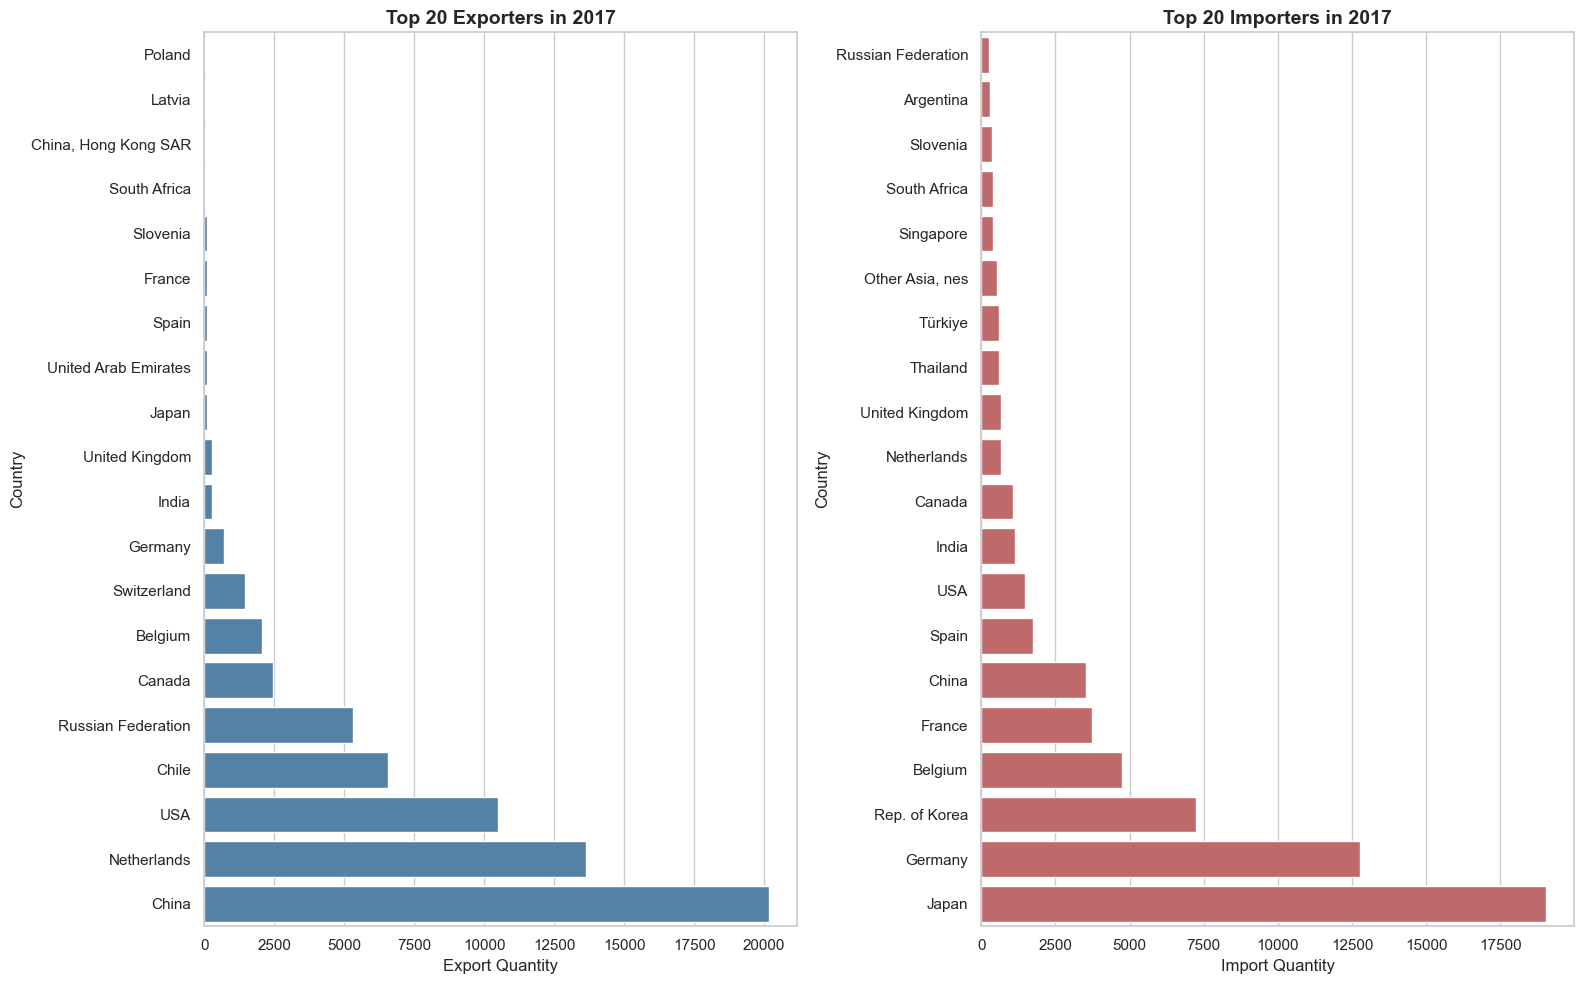

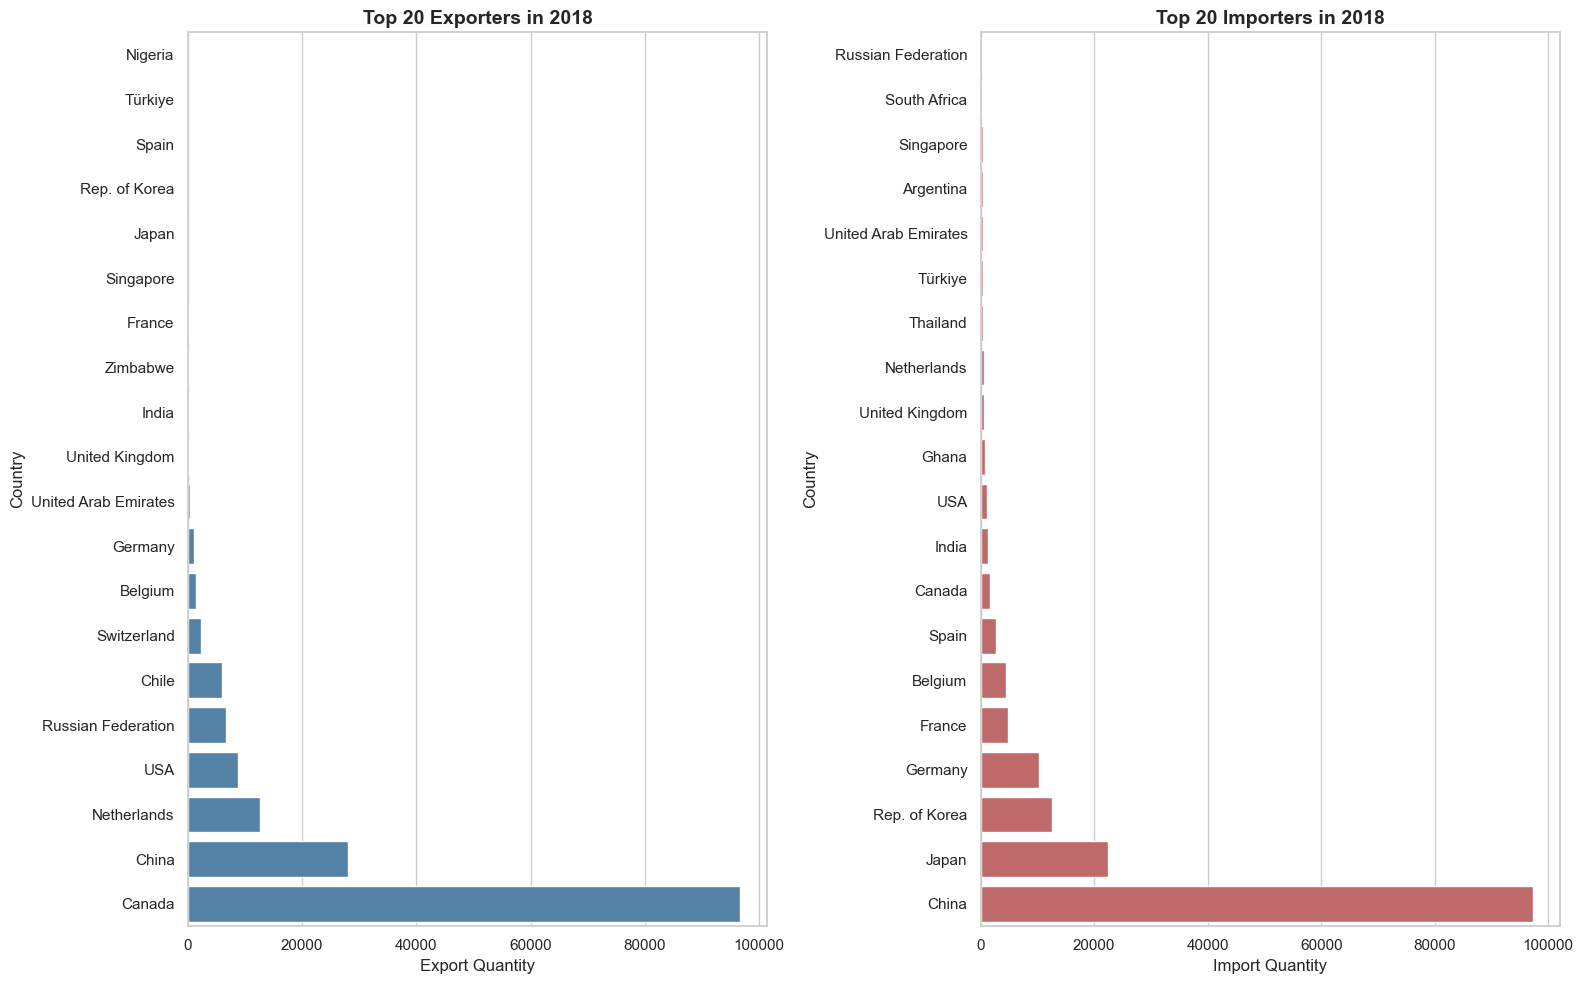

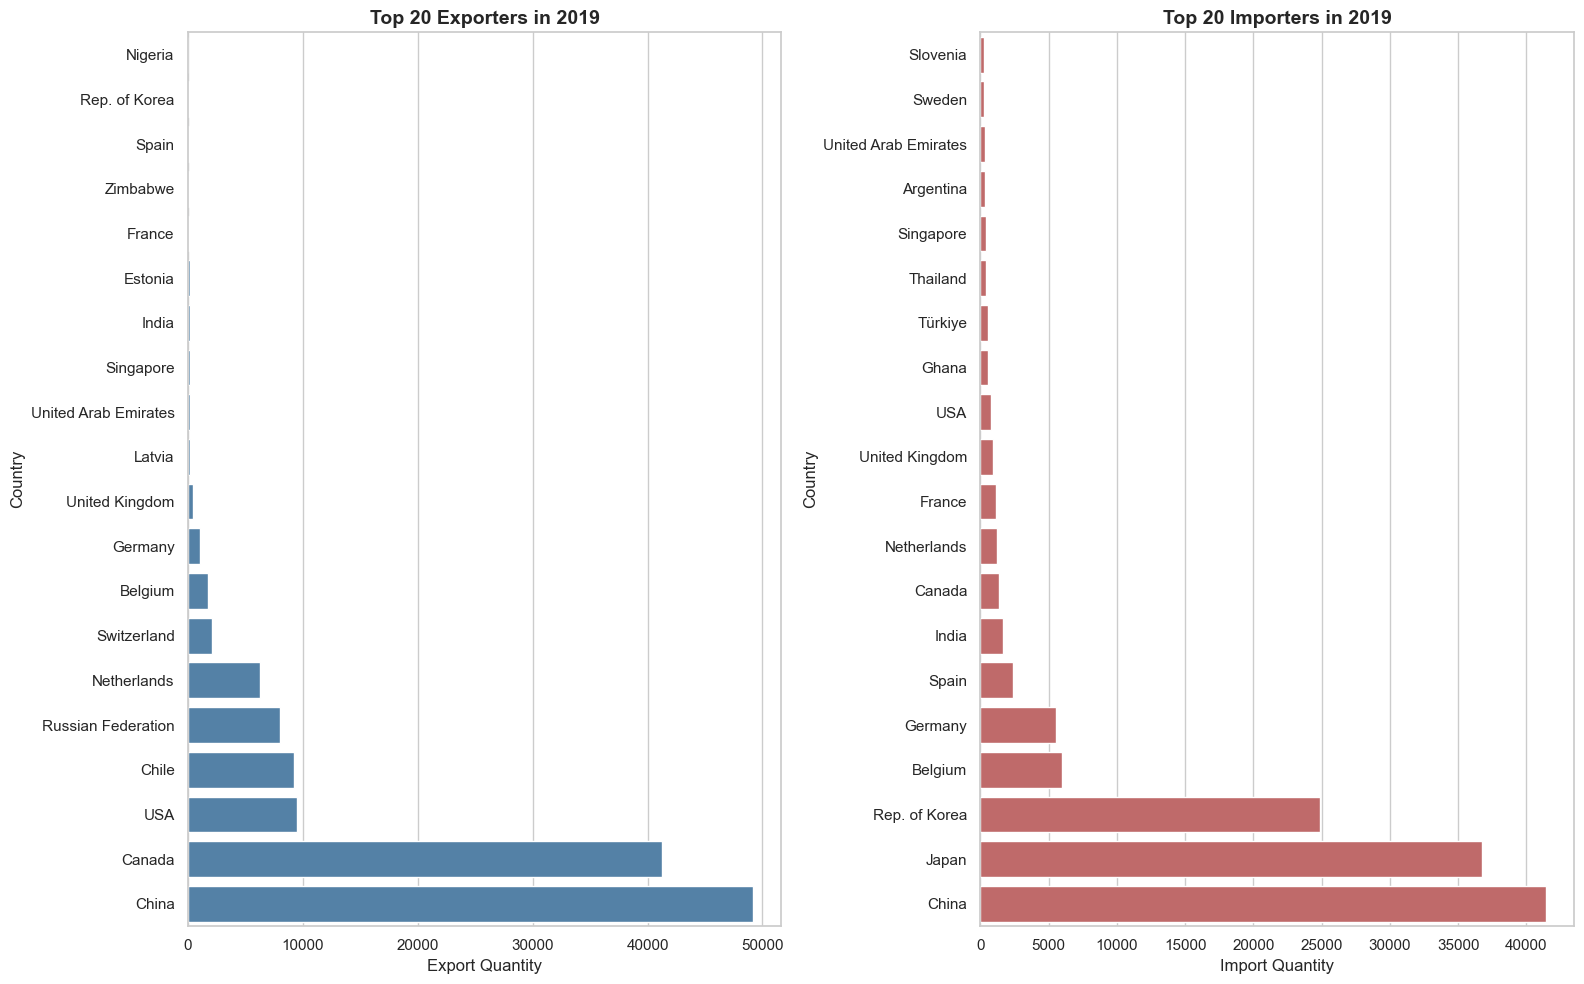

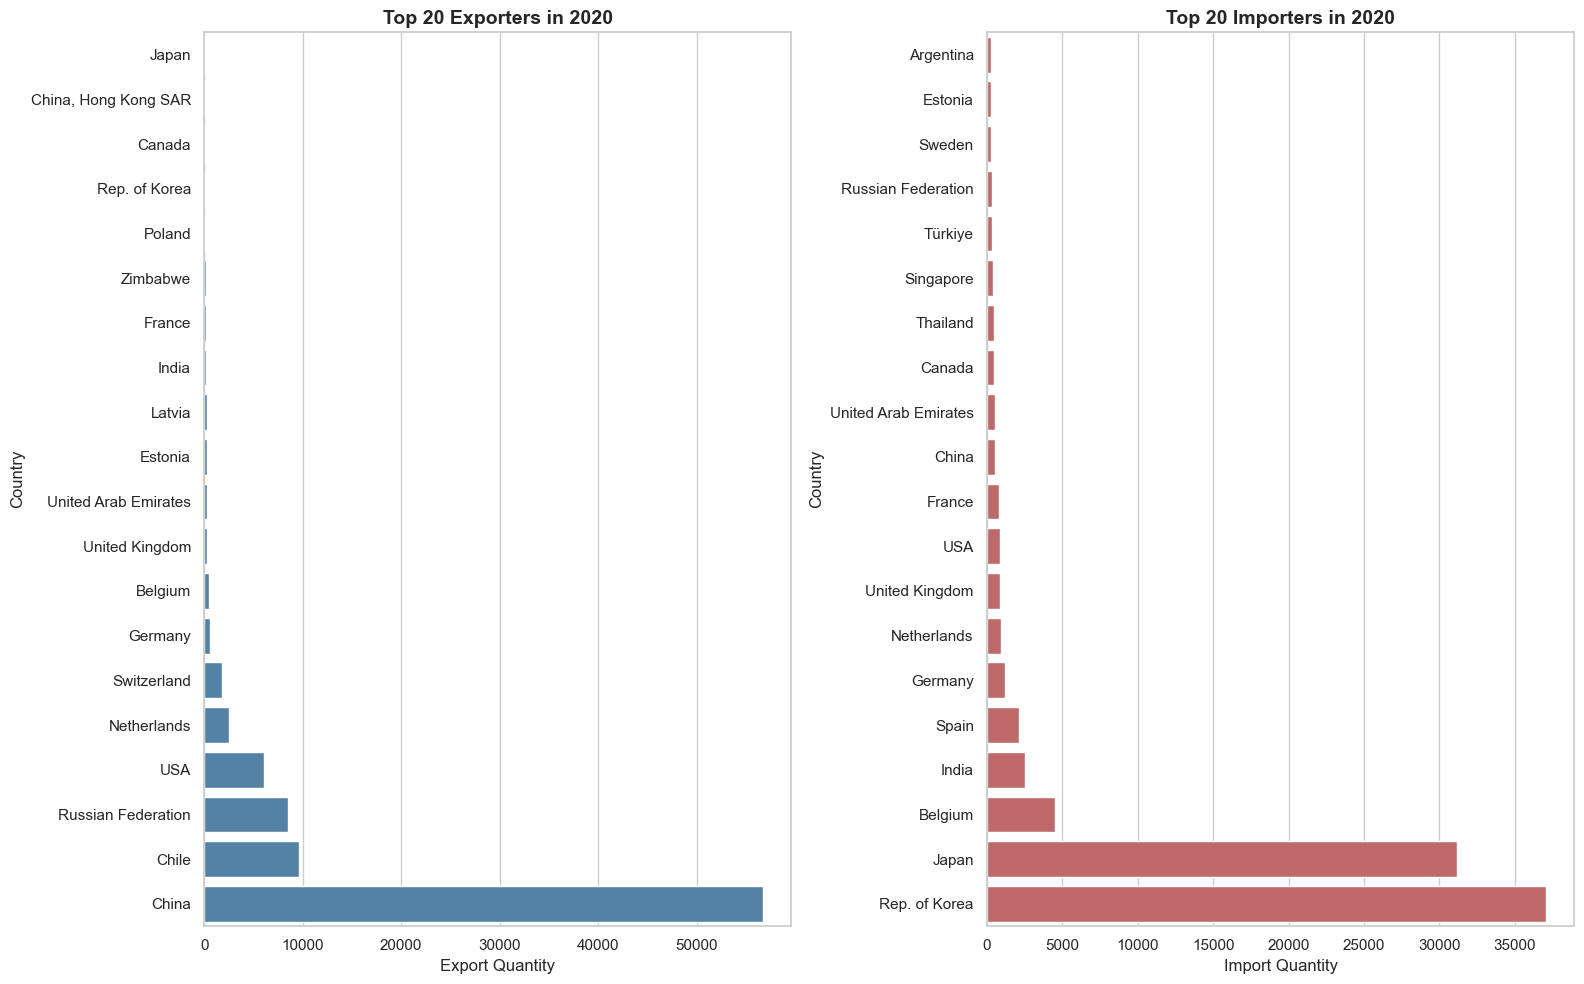

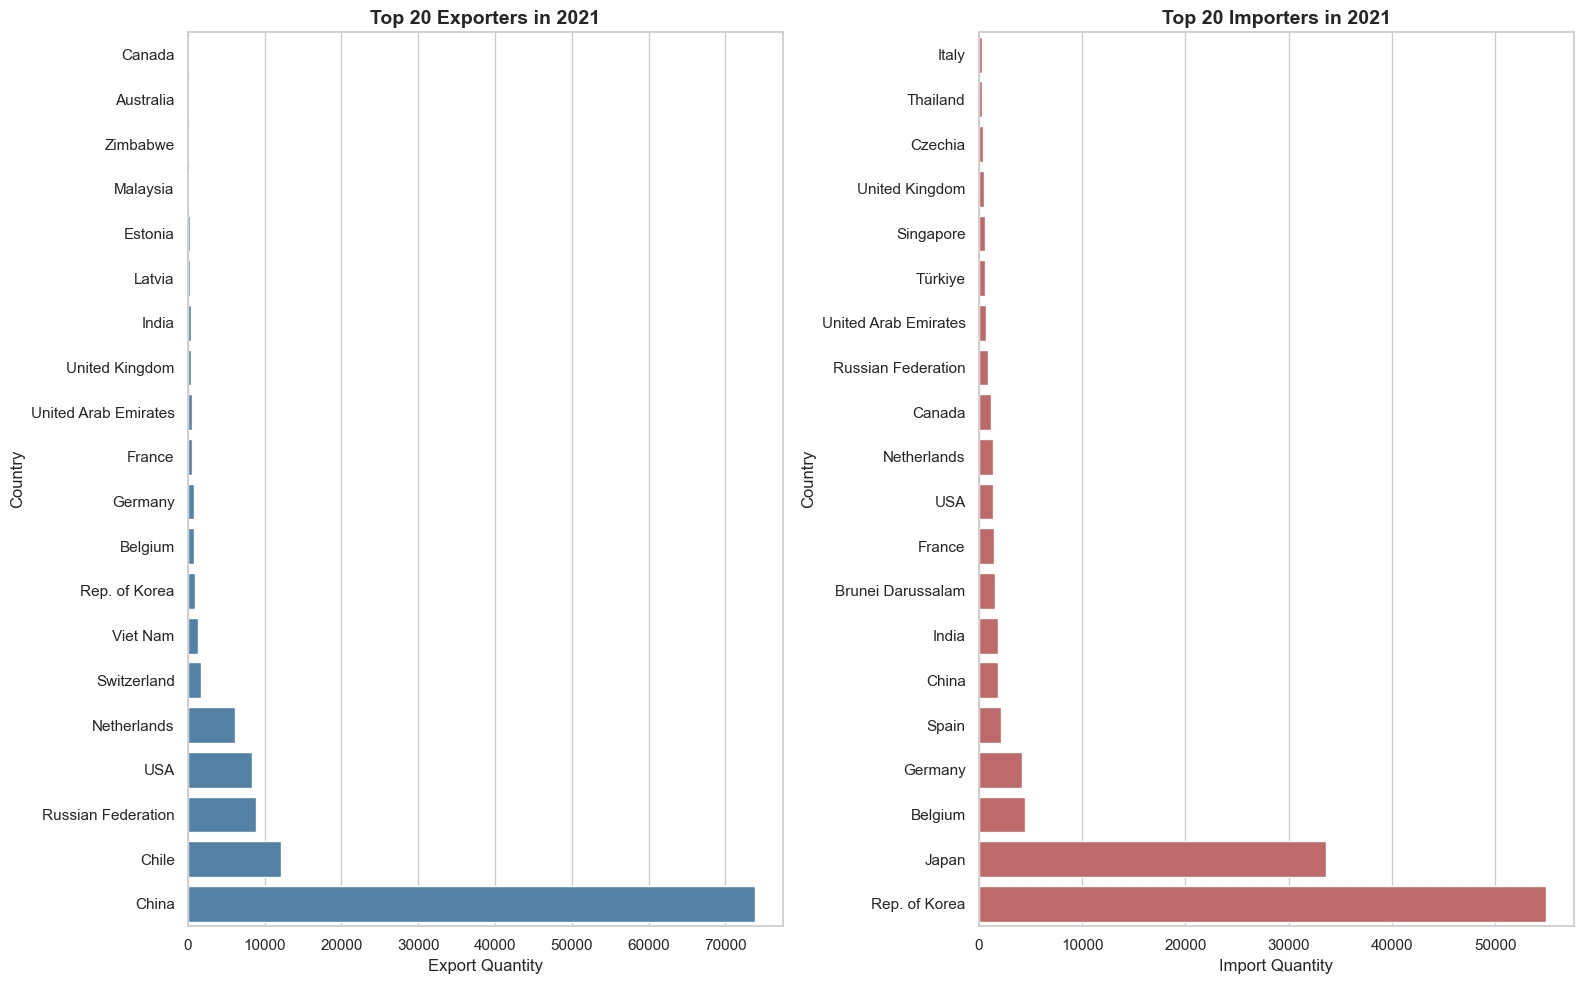

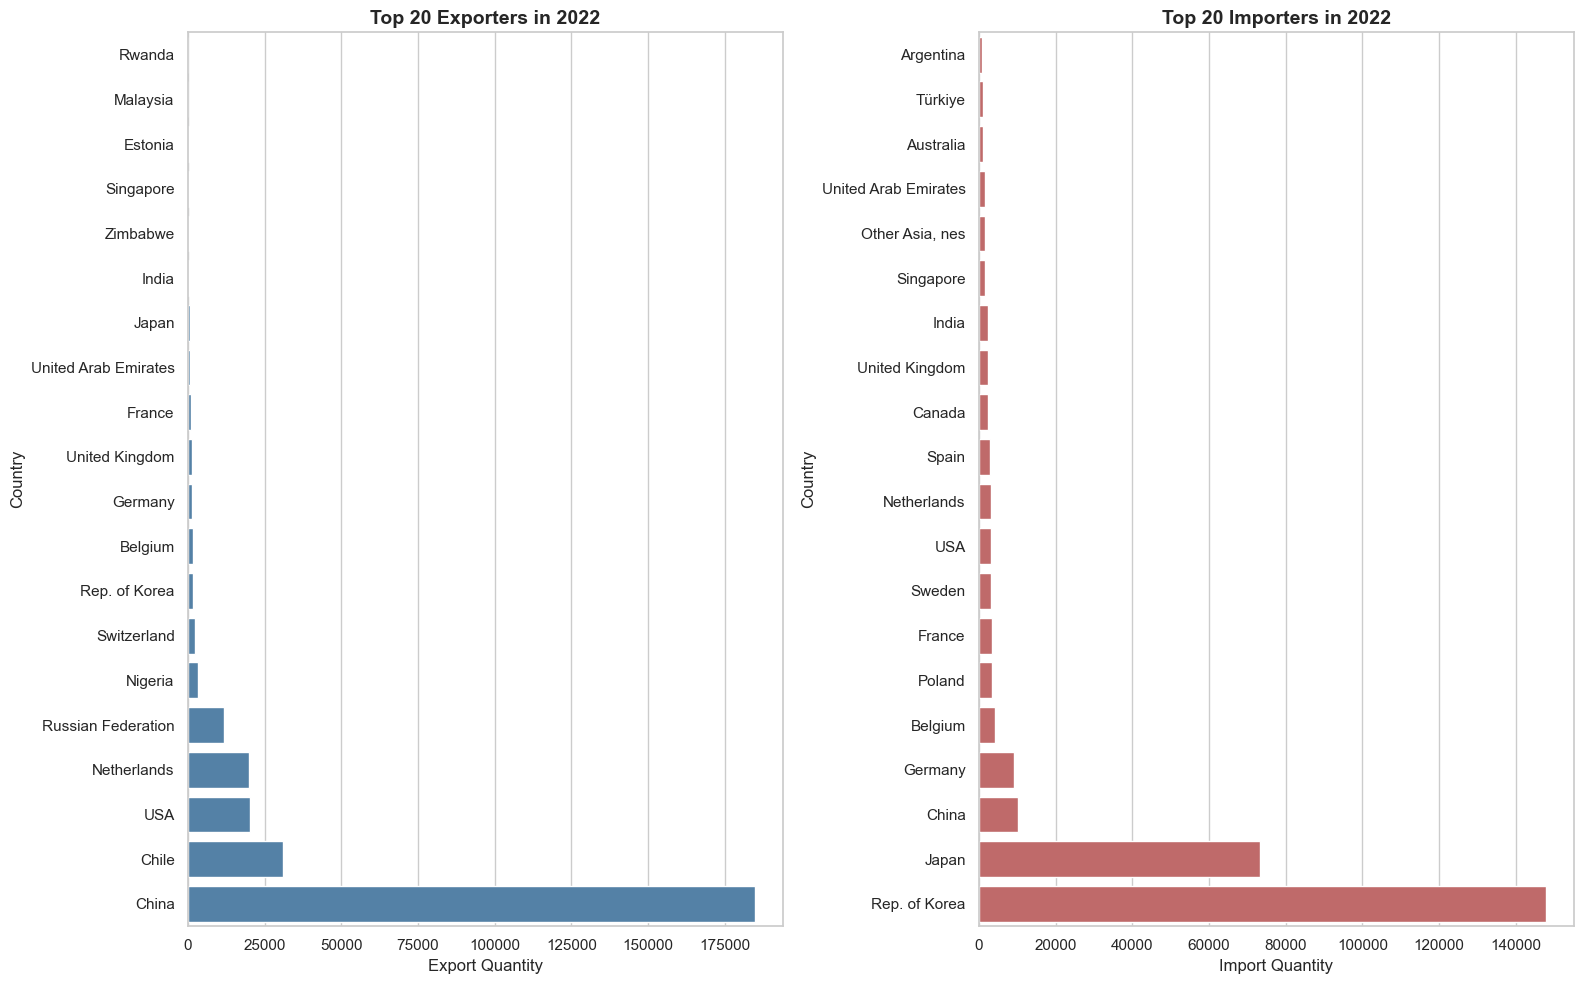

In [4]:
for y in years:
    df_year = df[df['t'] == y]

    # Aggregation by Exporter
    exports = df_year.groupby("export_country")['q'].sum().reset_index()
    exports = exports.sort_values('q', ascending=False).head(top_n)

    # Aggregation by Importer
    imports = df_year.groupby("import_country")['q'].sum().reset_index()
    imports = imports.sort_values('q', ascending=False).head(top_n)

    fig, axs = plt.subplots(1, 2, figsize=(16,10))

    # Visualization of Exporters
    exports = exports.sort_values('q')
    sns.barplot(x='q', y='export_country', data=exports, ax=axs[0], color='steelblue')
    axs[0].set_title(f"Top {top_n} Exporters in {y}", fontsize=14, fontweight='bold')
    axs[0].set_xlabel("Export Quantity")
    axs[0].set_ylabel("Country")

    # Visualization of Importers
    imports = imports.sort_values('q')
    sns.barplot(x='q', y='import_country', data=imports, ax=axs[1], color='indianred')
    axs[1].set_title(f"Top {top_n} Importers in {y}", fontsize=14, fontweight='bold')
    axs[1].set_xlabel("Import Quantity")
    axs[1].set_ylabel("Country")

    plt.tight_layout()
    plt.show()
